In [1]:
%load_ext autoreload
%autoreload

In [2]:
%matplotlib inline 

import sys
import os
import math

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl

sys.path.append('..')
from experiment import Experiment, show_mcmc_report
from plotting import plot_hetdex_image, plot_cmb_lensing_hetdex, plot_correlation

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

# Parameters

In [4]:
with open('../configs.yml', 'r') as config_file:
    config = yaml.full_load(config_file)
config = config['LoTSS_DR1']
display(config)

{'lss_survey': 'LoTSS_DR1',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 2.0,
 'bias': 2.1,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

# Data

In [5]:
experiment = Experiment(config, set_maps=True)

../data_lotss.py:141: TableReplaceWarning: converted column 'objID' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:141: TableReplaceWarning: converted column 'nfilt_eazy' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:141: TableReplaceWarning: converted column 'nfilt_atlas' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:141: TableReplaceWarning: converted column 'nfilt_cosmos' from integer to float
  data = read_fits_to_pandas(data_path)


Original LoTSS hetdex datashape: (318520, 143)
Total flux of S > 2mJy: (57928, 143)


../utils.py:128: RuntimeWarning: invalid value encountered in true_divide
  mean_map /= n_obj_map


Flux probability integral error: 0.0258
d flux: 1.9051 (mJy)


  0%|          | 0/786432 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".form

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colorm

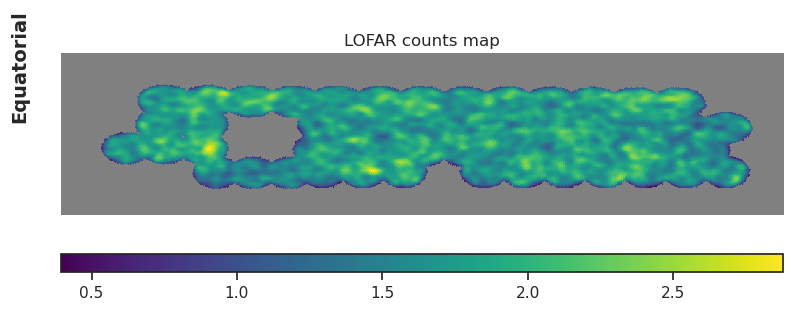

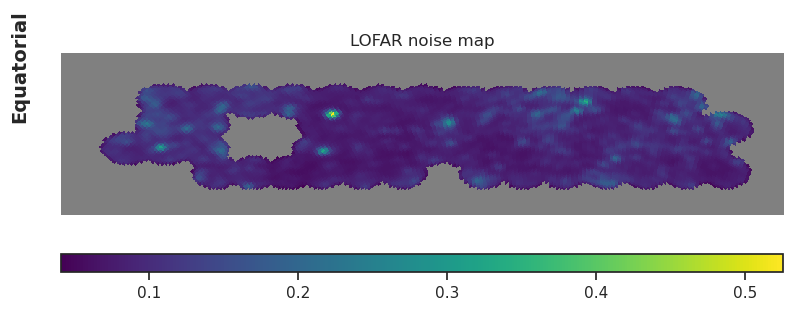

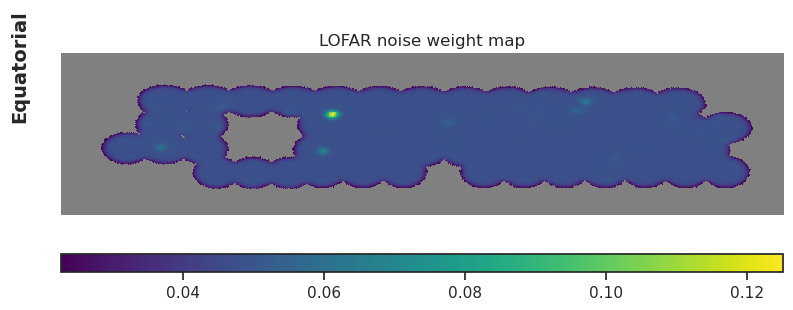

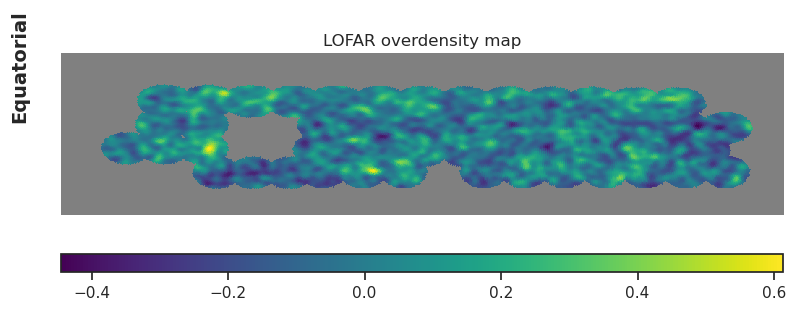

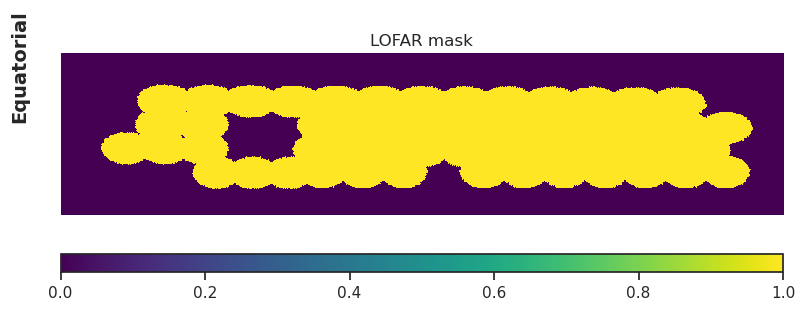

In [6]:
plot_hetdex_image(experiment.original_maps['g'], title='LOFAR counts map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.noise_maps['g'], title='LOFAR noise map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.noise_weight_maps['g'], title='LOFAR noise weight map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.processed_maps['g'], title='LOFAR overdensity map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.masks['g'], title='LOFAR mask')

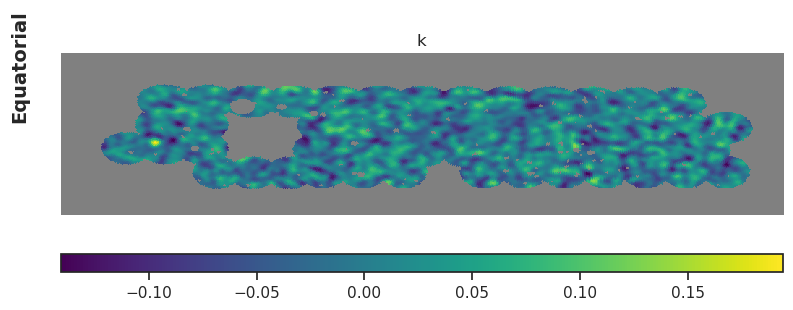

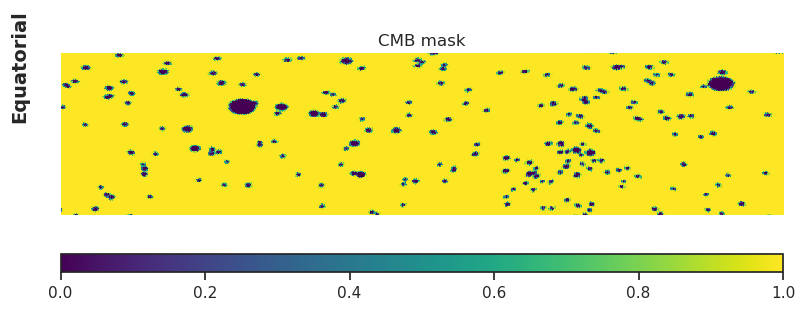

In [7]:
plot_cmb_lensing_hetdex(experiment)

# Power spectra

In [8]:
experiment.set_correlations()

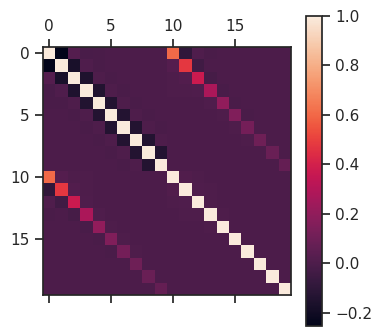

In [9]:
plt.matshow(experiment.inference_correlation)
plt.colorbar()

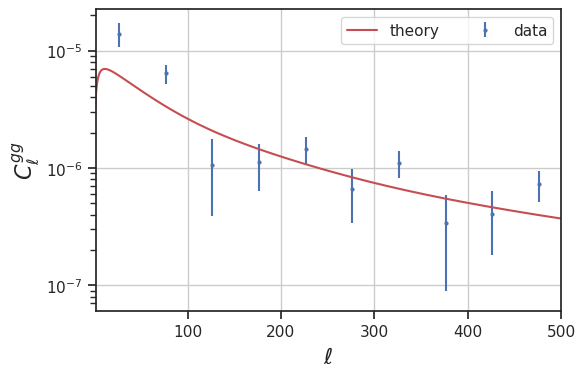

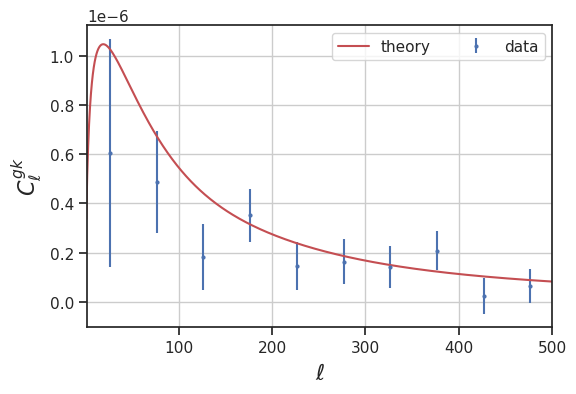

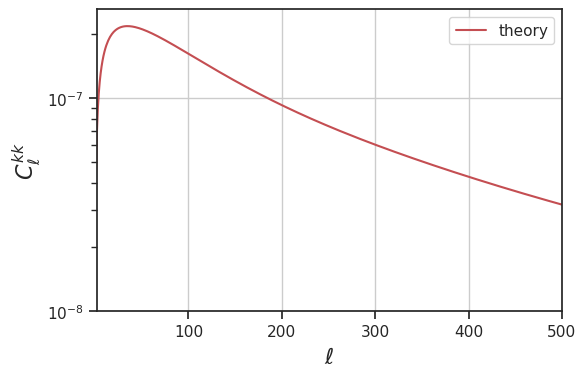

In [10]:
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'kk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

# Likelihood inference

Mean acceptance fraction: 0.6824527491408934


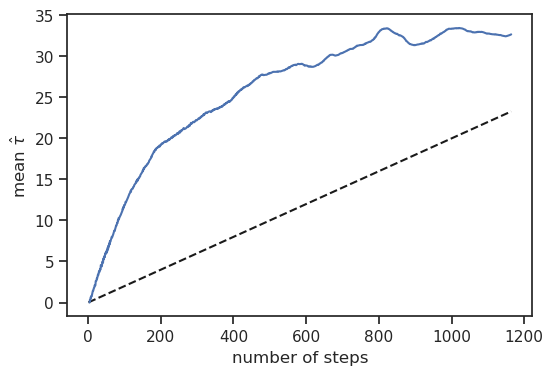

burn-in: 67
thin: 10
flat chain shape: (109, 32, 2)
flat log prob shape: (109, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

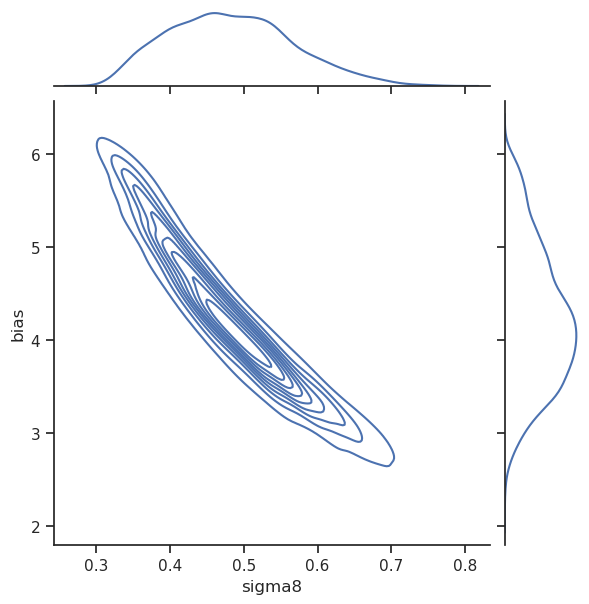

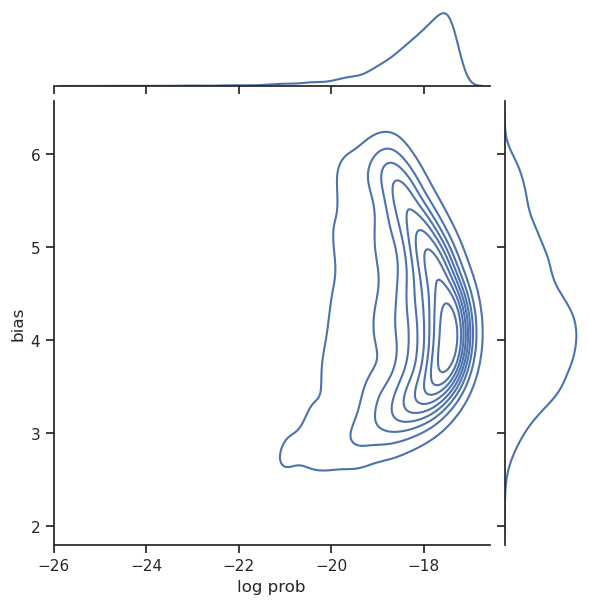

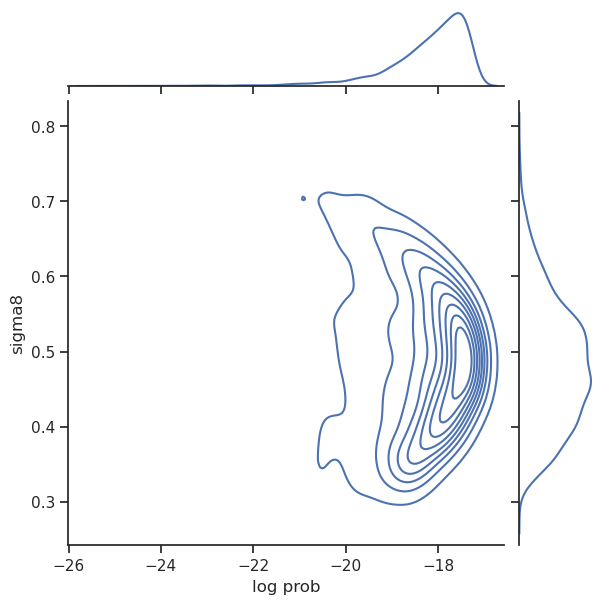

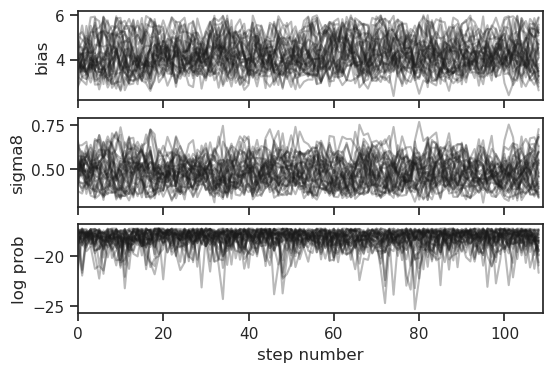

In [4]:
experiment_name = 'gg-gk__bias_sigma8__data-fixed_transposed'
show_mcmc_report(experiment_name, thin=10)

Mean acceptance fraction: 0.6869787172850159


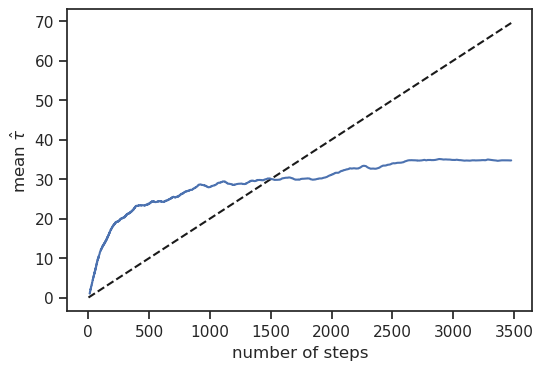

burn-in: 69
thin: 10
flat chain shape: (340, 32, 2)
flat log prob shape: (340, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

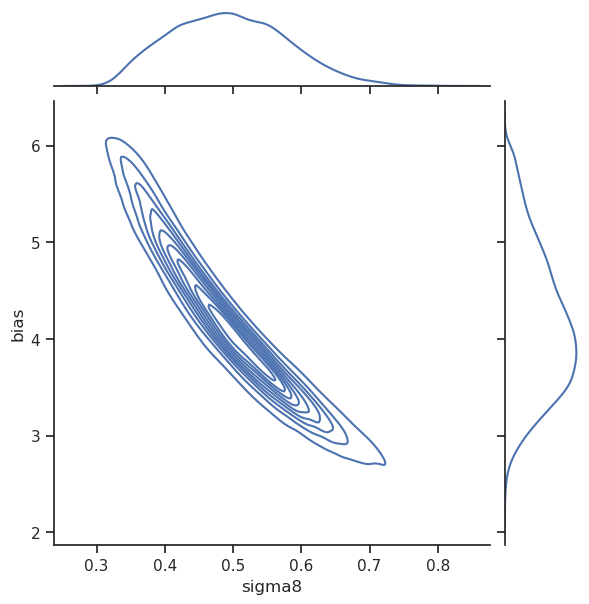

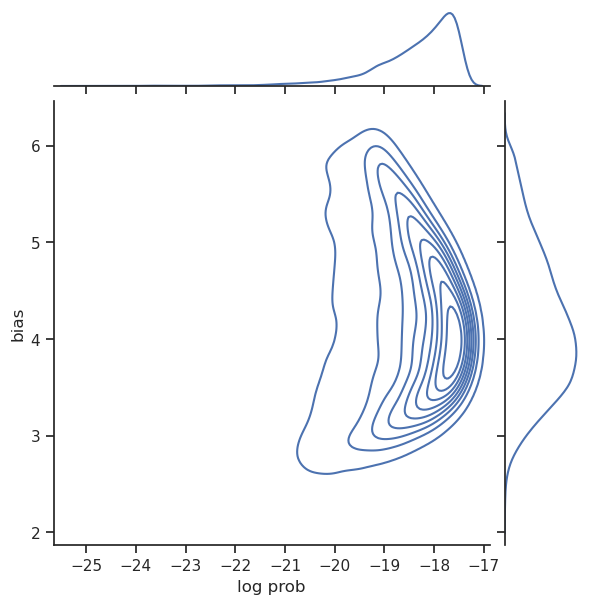

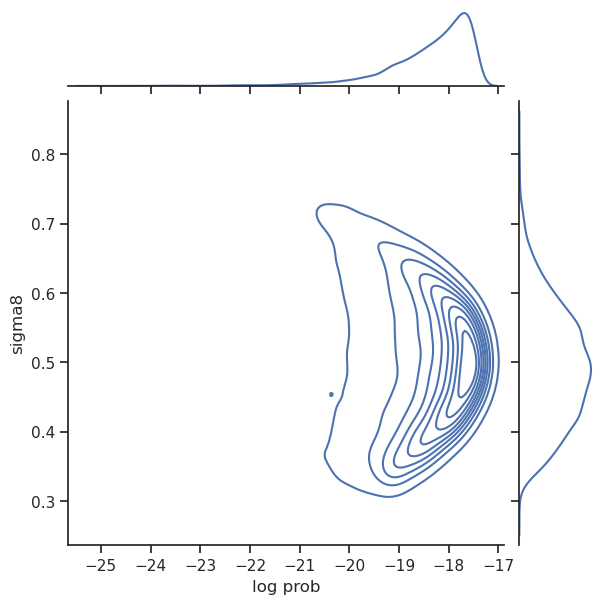

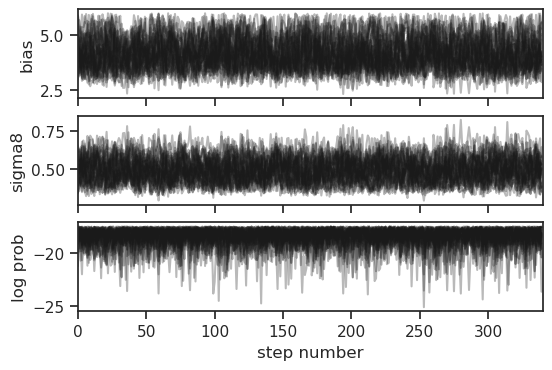

In [4]:
experiment_name = 'gg-gk__bias_sigma8__data-fixed'
show_mcmc_report(experiment_name, thin=10)

Mean acceptance fraction: 0.20891875


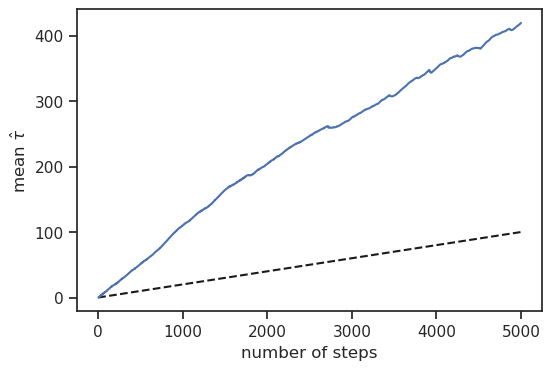

burn-in: 953
thin: 10
flat chain shape: (404, 32, 2)
flat log prob shape: (404, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

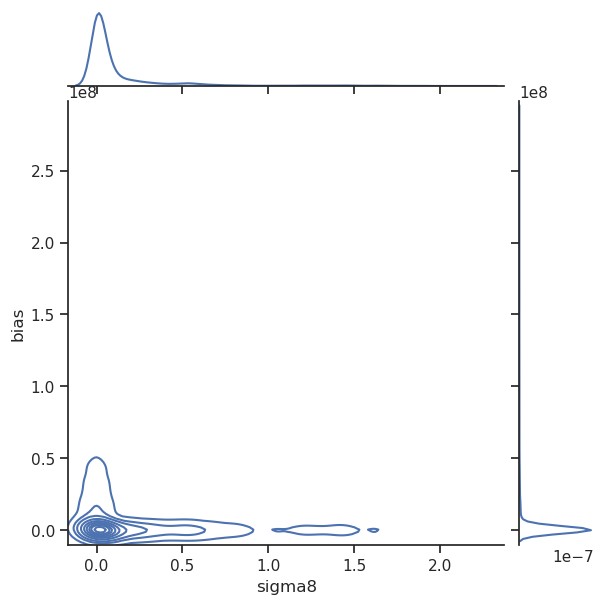

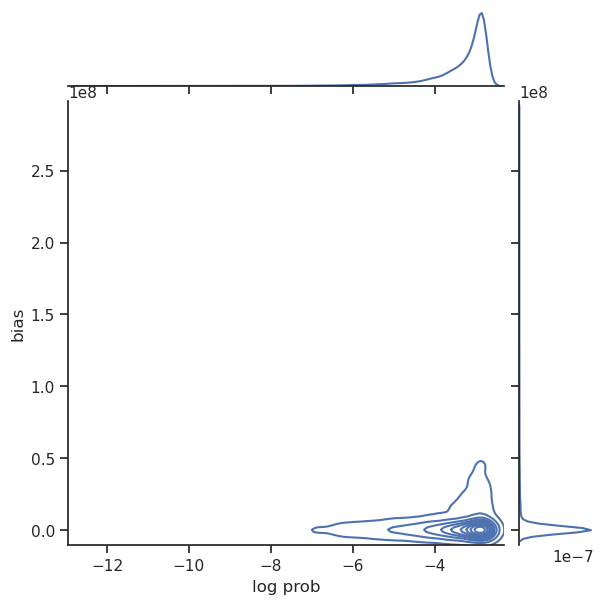

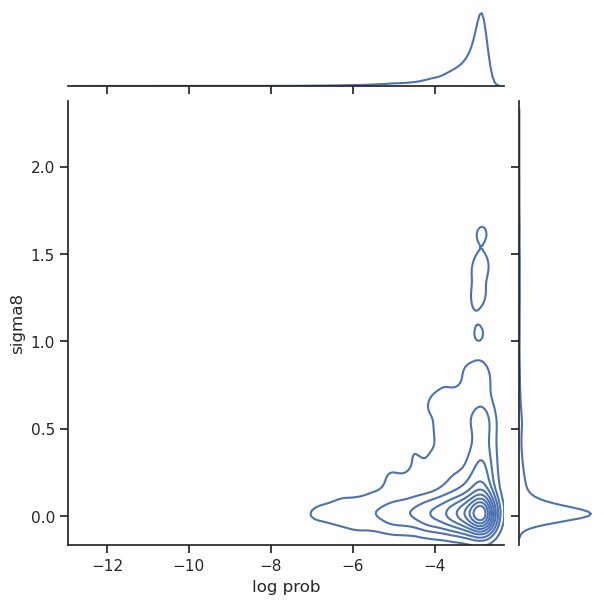

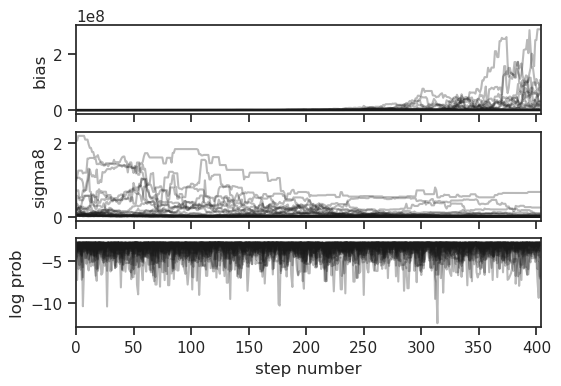

In [16]:
experiment_name = 'gk__bias_sigma8'
show_mcmc_report(experiment_name, thin=10)